<center><h1>HW2</h1></center>
<br>
<br>

Name: RYLAN NATHAN LEWIS
<br>
Github Username: Rylannat
<br>
USC ID: 8358130873

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Get the Cycle Power Plant Data Set

In [ ]:
df = pd.read_excel("../Data/Folds5x2_pp.xlsx", sheet_name = "Sheet1")

In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [5]:
df.shape

(9568, 5)

There are 9568 rows and 5 columns.

In [6]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

There are 9568 rows and each row represents a record of the average hourly measurement of the power plant operating at full load over 6 years (2006-2011)

The 5 columns represent the hourly average values of the 4 independent variables (features), namely the "Ambient Temperature" (AT), "Exhaust Vacuum" (V), "Ambient Pressure" (AP) and "Relative Humidity" (RH), which are used to predict the single dependent variable, i.e the Net hourly "Electrical Energy output" (PE) of the CCPP.

#### ii. pairwise scatterplots of all the variables

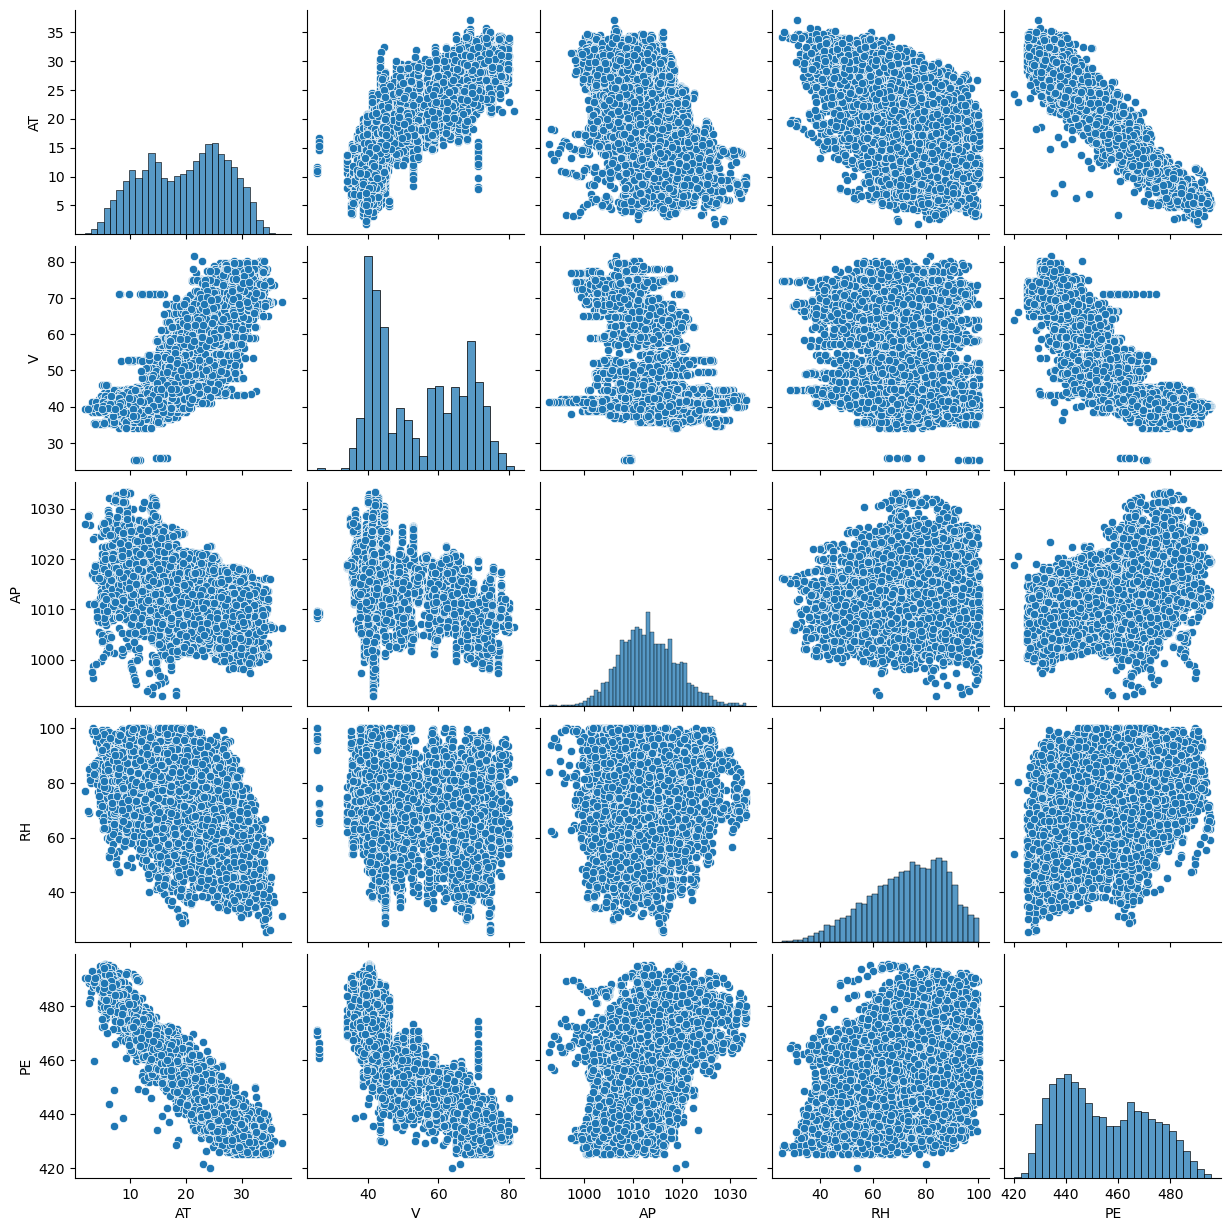

In [7]:
sns.pairplot(df)

1. For Ambient Temperature (AT) and Energy Output (PE): 
   There is a strong and clear negative correlation between AT and PE, indicating that as the temperature of the plant increases by around 20 units, the energy output hugely decreases by almost 60 units. This directly indicates that at higher temperatures, the Gas turbine efficiency reduces. 
2. For Exhaust Vacuum (V) and Energy Output (PE):
   There is again a negative correlation between V and PE. However, at lower Exhaust Vacuums (around 40-50 units), it can be observed that the Energy output does not fall as fast, leading to understand that the steam turbines can be efficient enough till a certain unit of vacuum, after which it finds it difficult to work at that same amount of efficiency. There are also some data points which seem like possible outliers.
3. For Ambient Pressure (AP) and Energy Output (PE):
   It can be observed that the energy output does increase as the pressure in the gas turbine increases, however this relationship is pretty weak as even though there is a slight observation of the output increasing, the data still seems quite spread out. It can be safely concluded that Ambient pressure and energy output have a weak positive correlation.
4. For Relative Humidity (RH) and Energy Output (PE):
   Relative Humidity and Energy output have an extremely weak positive correlation, indicating that RH does not have much impact on the prediction of the energy output of the plant
5. For the Feature vectors with themselves:
   AT and V have a good positive correlation between each other, supporting the fact that as temperature of the gas turbine increases, the pressure in the steam turbine also increases.
   AP has a very weak to almost NULL negative correlation with both AT and V
   RH has a weak negative correlation with AT , whereas it doesnt really display any correlation with AP and V, as all 3 show the same spread trend as the respective predictor's value increases.

In summary, AT and V are the strongest predictors of PE in contrast to AP and V. Most of the scatterplots do not show any outliers but scatterplots involving the pressure predictor have some potential outlier data points at certain pressure values.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [8]:
stats = []
stats = df.describe().T
stats['range'] = stats['max'] - stats['min']
stats['iqr']  = stats['75%'] - stats['25%']

print(stats[['mean','50%','range','25%','75%','iqr']])

           mean       50%  range        25%      75%      iqr
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


### (c) Simple Linear Regression

In [9]:
features = df.drop('PE',axis=1).columns

for x in features:
    X = sm.add_constant(df[x])   
    mod = sm.OLS(df['PE'],X)
    result = mod.fit()
    print(f"\n Simple Linear Regression of PE with {x}")
    print(result.summary())


 Simple Linear Regression of PE with AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:45   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

The least squared method has been used for plotting the simple regression model. The p-value Following are some inferences:
1. For PE and AT:


   a) The coefficient is -2.17, indicating a strong negative correlation, showing that high temperatures of GT reduces PE

   
   b) The R^2 value is 0.899 , proving that a huge factor of the variability in PE can be explained by effect of AT.


   c) The p-value is <0.05, proving that AT is statistically significant

2. For PE and V:


   a) The coefficient is -1.1681, again indicating a negative correlation, showing that high exhaust vacuum in the ST reduces PE too


   b) The R^2 value is 0.757, proving that even V can hugely explain its effect on the variability in PE


   c) The p-value is < 0.05 , proving that V is also statistically significant

3. For PE and AP:

   a) The coefficient is 1.4899, this time indicating a positive correlation between AP and PE, indicating that as pressure in the GT increases, PE increases.

   b) The R^2 value is 0.269, meaning that AP is not an impactful predictor of PE , and cant properly explain variability of PE due to its effect

   c) The p-value is <0.05, proving that AP is statistically significant

4. For PE and RH:

   a) The coefficient is 0.4557, indicating a weak positive correlation between RH and PE, showing that even if RH increases, it wont have much effect on PE's rise

   b) The R^2 value is 0.152, meaning that RH is a very weak predictor of PE, unable to contribute meaningfully in explaining variability of PE due to its effect.

   c) The p-value is <0.05 , indicating that RH is also statistically significant.


5. AT and V have very large t-values, so it can be confidently said that they really affect PE. AP and RH also look significant, but their t-values are much smaller, which means their influence is weaker and could partly be due to overlap with the other predictors.


All predictors are indicated as having a statistically significant relationship with PE (null hypothesis of Beta = 0 is rejected by all models as p<0.05)

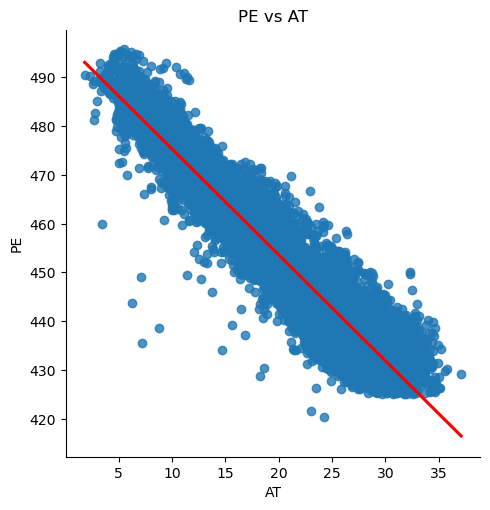

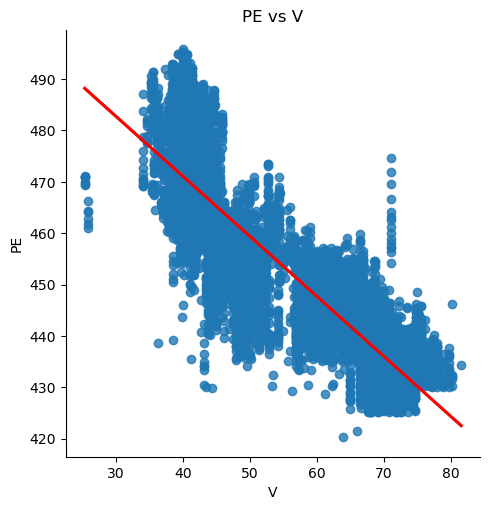

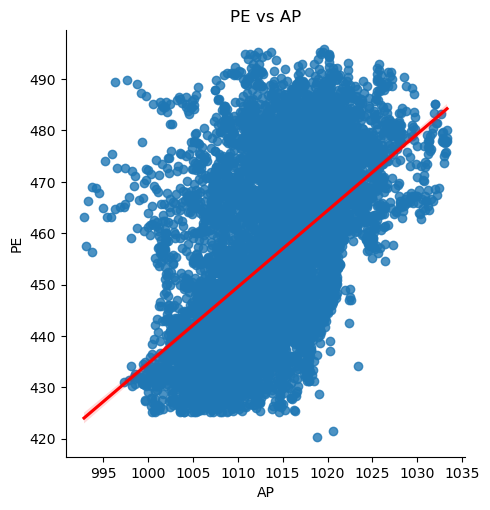

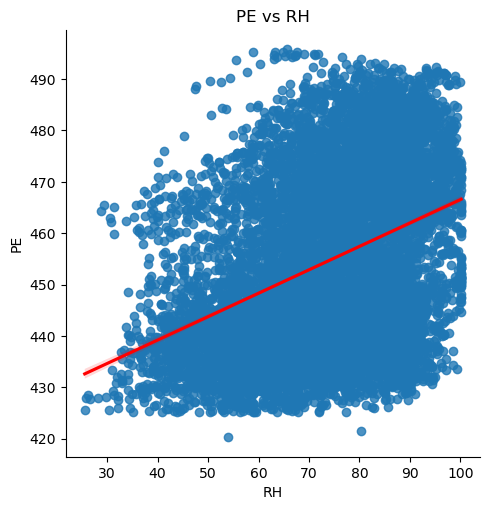

In [10]:
for col in df.drop('PE', axis=1).columns:
    sns.lmplot(x=col, y='PE', data=df, line_kws={'color':'red'})
    plt.title(f"PE vs {col}")
    plt.show()

1. For AT and V, there is a clear and robust negative trend line, where as for AP and RH, the line is poorly fit around the data with a weak positive trend.
2. In terms of outliers, much can't be said about AP and RH as the data is spread making outlier detection difficult.
3. AT has a tight negative trend of data points with a few occasional data points veering a little farther away from the line, however not proving to be as much of a problem on the model.
4. In the plot of PE vs V, certain data points at specific V values tend to show outlier behavior as they move away from the line for the same value of V, so those are points which I would identify and erase from the dataset.

### (d) Multiple Regression

In [11]:
features_mult = df.drop('PE', axis=1).columns
X_mult = sm.add_constant(df[features_mult])
Y_mult = df['PE']

mod_mult = sm.OLS(Y_mult, X_mult)
res_mult = mod_mult.fit()

print(f"\n Multiple Linear Regression of PE with all features")
print(res_mult.summary())



 Multiple Linear Regression of PE with all features
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

1. This model shows that all four predictors  are statistically significant (having p-value < 0.05) and thus we can reject the Null hypothesis for all predictors in this case. This model too shows that the strongest predictor of PE is AT and the weakest is AP.
2. AT, V and RH show a negative correlation with PE and only AP shows a very weak positive correlation with PE.
3. The model also has a R^2 value of 0.929, indicating a very strong fit to the data due to its combined effect of all 4 predictors on PE. 

### (e) 1c Compare to 1d

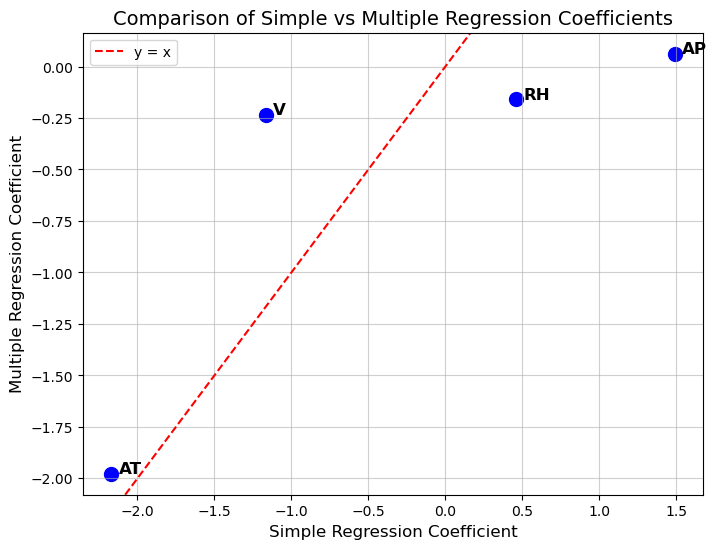

In [ ]:
coef_simplereg = [-2.1713, -1.1681, 1.4899, 0.4557]  # AT, V, AP, RH from simple regression summary

coef_multiplereg = [-1.9775, -0.2339, 0.0621, -0.1581]  # AT, V, AP, RH from multiple regression summary

predictors = ['AT', 'V', 'AP', 'RH']

plt.figure(figsize=(8,6))
plt.scatter(coef_simplereg, coef_multiplereg, color='blue', s=100)

#Line of reference
plt.axline((0,0), slope=1, color='red', linestyle='--', label='y = x')

# This line just labels the predictor points on plot
for i, p in enumerate(predictors):
    plt.text(coef_simplereg[i]+0.05, coef_multiplereg[i], p, fontsize=12, weight='bold')

plt.xlabel("Simple Regression Coefficient", fontsize=12)
plt.ylabel("Multiple Regression Coefficient", fontsize=12)
plt.title("Comparison of Simple vs Multiple Regression Coefficients", fontsize=14)
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.show()


1. The coefficient of AT slightly dropped from -2.1713 (simple) to -1.9775(multiple), however still indicating a strong negative correlation with PE and still proving to be the strongest predictor of PE 
2. V's coefficient however showed a sharp decline from -1.1681 to -0.2339, implying that most of its impact on PE was actually due to its strong positive correlation with AT.
3. AP proved to be an almost non-impactful predictor on PE with its coefficient falling from 1.4899 to 0.0621 when all the other predictors were factored in, also suggesting that its apparent effect on PE during simple regression would just have been due to its correlation to other predictors instead of a direct correlation with PE. The small t-statistic value of AP during simple regression is a proof of the possible weak estimation of beta and the dependence of its correlation with other predictors on having an impact on PE
4. RH had an inverse in the behavior of its correlation, a positive 0.4557 in simple regression to a negative trend of -0.1581 in multiple regression, indicating that the effect of other predictors revealed its true trend of being negative on PE.
5. The R^2 value of multiple regression is larger than each of the R^2 values of each simple regression model, indicating that the best fit line is when all the predictors are combined.
6. All predictors remain statistically significant (p < 0.05), though their relative impact varies based on t-value, with AT and RH showing the strongest effect due to their large t-statistic value

### (f) Nonlinear Association

In [13]:
X_nonl = df.drop('PE',axis =1).columns

# Create polynomial terms
for x in X_nonl:
    x_current = df[x]
    X_poly = np.column_stack((x_current, x_current**2, x_current**3))
    X_poly = sm.add_constant(X_poly)
    mod_nonl = sm.OLS(df['PE'], X_poly)
    result_nonl = mod_nonl.fit()
    print(f"\n Non Linear association check of PE with {x}")
    print(result_nonl.summary())


 Non Linear association check of PE with AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:47   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

1. On observing the P-values for the quadratic (X^2) and cubic (X^3) parameter, it is easily observable that the p-values of these parameters for AT, AP and RH are all less than 0.05, meaning that these parameters are significant and imply that there is a non-linear association between these three predictors and PE for a model of this form.
2. For the V predictor, the quadratic term is not significant (0.768) whereas the cubic term is significant (0.014) , which means that the overall model has a non-linear relationship which is mainly captured at the cubic level for the model of this form.

### (g) Interactions of Predictors

In [14]:
predictors = df.drop('PE', axis=1).columns
formula = 'PE ~ ' + ' + '.join(predictors) + ' + ' + ' + '.join([f'{i}:{j}' for i in predictors for j in predictors if i < j])

interaction_model = smf.ols(formula=formula, data=df).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:47   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

There is evidence of association of interactions of predictors with the response (PE). 
1. p value of AT indicates that AT does not act independently in affecting PE, but its interaction with other predictors results in its strong impact on PE, namely V and RH (thier interaction p values are significant). The p values of other predictors (V,AP,RH) indicate that they act independtly in predicting PE.
2. The statistically significant interaction pairs are AT:V, AT:RH, AP:V, and AP:RH (p-values less than 0.05), implying that the effects of AT and AP on PE depend on other predictors(V and RH).
3. In contrast, interactions such as AP:AT and RH:V are not significant, indicating no evidence of interaction for these pairs.

### (h) Improvement

In [17]:
pred_list = df.drop('PE', axis=1).columns

train_set, test_set = train_test_split(df, test_size = 0.3, random_state=50)

formula_simple = 'PE~' + '+'.join(pred_list)

mod_simp = smf.ols(formula=formula_simple, data = train_set).fit()

y_train_pred_simp = mod_simp.predict(train_set)
y_test_pred_simp = mod_simp.predict(test_set)

mse_train_simple = mean_squared_error(train_set['PE'], y_train_pred_simp)
mse_test_simple = mean_squared_error(test_set['PE'], y_test_pred_simp)

print("Basic Linear Regression:")
print(mod_simp.summary())
print("Train MSE:", mse_train_simple)
print("Test MSE:", mse_test_simple)

Basic Linear Regression:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.165e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:49   Log-Likelihood:                -19679.
No. Observations:                6697   AIC:                         3.937e+04
Df Residuals:                    6692   BIC:                         3.940e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    453.4075     1

In [18]:
formula_allpred = 'PE ~ ' + ' + '.join(predictors) \
                    + ' + ' + ' + '.join([f'I({x}**2)' for x in predictors]) \
                    + ' + ' + ' + '.join([f'{i}:{j}' for i in predictors for j in predictors if i < j])

model_allpred = smf.ols(formula=formula_allpred, data=train_set).fit()

def stepwise_pval(model, alpha=0.05):
    terms = set(model.model.exog_names)
    terms.discard('Intercept')

    while True:
        pvals = model.pvalues.drop('Intercept')
        worst_p = pvals.idxmax()
        if pvals[worst_p] <= alpha:
            break

        to_remove = {worst_p}
        if ":" not in worst_p and not worst_p.startswith("I("):
            to_remove |= {t for t in terms if worst_p in t and t != worst_p}

        terms -= to_remove
        new_formula = "PE ~ " + " + ".join(terms)
        model = smf.ols(formula=new_formula, data=train_set).fit()

    return model



model_allpred_final = stepwise_pval(model_allpred, alpha=0.05)

y_train_pred_allpred = model_allpred_final.predict(train_set)
y_test_pred_allpred = model_allpred_final.predict(test_set)

mse_train_allpred = mean_squared_error(train_set['PE'], y_train_pred_allpred)
mse_test_allpred = mean_squared_error(test_set['PE'], y_test_pred_allpred)

print("\n Regression with all predictors (interactions + quadratic):")
print(model_allpred_final.summary())
print("Train MSE:", mse_train_allpred)
print("Test MSE:", mse_test_allpred)


 Regression with all predictors (interactions + quadratic):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9158.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:26:49   Log-Likelihood:                -19203.
No. Observations:                6697   AIC:                         3.843e+04
Df Residuals:                    6685   BIC:                         3.851e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

The regression model bundled with the interaction and quadratic terms shows lesser MSE for both train and test, indicating that this model can better capture non-linearity in the data due to high order polynomial flexibility and by understanding how interaction terms can better explain behavior of a predictor on the response PE.

### (i) KNN

In [ ]:
x_knn = df.drop('PE', axis=1)
y_knn = df['PE']

X_knn_train,X_knn_test,Y_knn_train,Y_knn_test = train_test_split(x_knn,y_knn, test_size = 0.3, random_state = 50)

scaler = StandardScaler()
X_knn_train_norm = scaler.fit_transform(X_knn_train)
X_knn_test_norm = scaler.transform(X_knn_test)

train_errors_knn , test_errors_knn = [] , []
train_errors_knn_norm , test_errors_knn_norm = [] , []

k_vals = range(1,101)

for k in k_vals:
    knn_raw = KNeighborsRegressor(n_neighbors = k)
    knn_raw.fit(X_knn_train, Y_knn_train)
    train_preds_raw = knn_raw.predict(X_knn_train)
    test_preds_raw = knn_raw.predict(X_knn_test)
    train_err_raw = mean_squared_error(Y_knn_train , train_preds_raw)
    test_err_raw = mean_squared_error(Y_knn_test , test_preds_raw)
    train_errors_knn.append(train_err_raw)
    test_errors_knn.append(test_err_raw)

    knn_norm = KNeighborsRegressor(n_neighbors = k)
    knn_norm.fit(X_knn_train_norm , Y_knn_train)
    train_preds_norm = knn_norm.predict(X_knn_train_norm)
    test_preds_norm = knn_norm.predict(X_knn_test_norm)
    train_err_norm = mean_squared_error(Y_knn_train,train_preds_norm)
    test_err_norm = mean_squared_error(Y_knn_test,test_preds_norm)
    train_errors_knn_norm.append(train_err_norm)
    test_errors_knn_norm.append(test_err_norm)


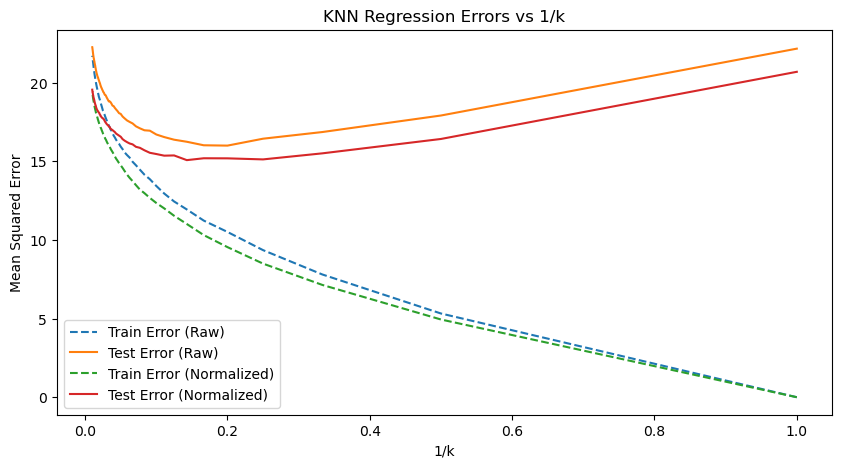

In [20]:
plt.figure(figsize=(10,5))

plt.plot([1/k for k in k_vals], train_errors_knn, label="Train Error (Raw)", linestyle="--")
plt.plot([1/k for k in k_vals], test_errors_knn, label="Test Error (Raw)")

plt.plot([1/k for k in k_vals], train_errors_knn_norm, label="Train Error (Normalized)", linestyle="--")
plt.plot([1/k for k in k_vals], test_errors_knn_norm, label="Test Error (Normalized)")

plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression Errors vs 1/k")
plt.legend()
plt.show()

In [21]:
best_k_raw = k_vals[np.argmin(test_errors_knn)]
best_k_norm = k_vals[np.argmin(test_errors_knn_norm)]

print(f"Best k (raw): {best_k_raw}")
print(f"Best k (normalized): {best_k_norm}")
print(f"Best test MSE for raw features: {min(test_errors_knn):.2f}")
print(f"Best test MSE for normalized features: {min(test_errors_knn_norm):.2f}")

Best k (raw): 5
Best k (normalized): 7
Best test MSE for raw features: 16.00
Best test MSE for normalized features: 15.08


### (j ) Compare KNN and Linear

Comparison:
1. The linear regression model, which included quadratic and interaction terms, achieved an adjusted R² of 0.938. This explained about 94% of the variance in PE and showed strong interpretability of predictor effects. However, its test MSE was higher than that of KNN.

2. KNN regression performed best with normalized features at k=7, producing a test MSE of 15.08 compared to 16.00 with raw features. This represents the lowest test error across all models, suggesting that KNN captured complex local nonlinear patterns more effectively than the regression model. Normalization improved performance, as expected, since KNN relies on distance and is sensitive to feature scale.

3. Overall, while the regression model is more interpretable and provides insights into predictor relationships, KNN achieved better predictive accuracy. Therefore, for this dataset, KNN is the better choice when minimizing error is the main goal, while regression remains useful for understanding underlying relationships.
   

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

1. A flexible model will try to assume higher order polynomial variables for its predictors, which in turn will help it learn much more complex patterns within the dataset very sharply, resulting in learning of key complex features which leads to low bias and improving its generalization on test data as well which keeps the variance low. In this case, there is no problem of the model getting overfit as well due to the large amount of data being present, so the model would actually learn patterns instead of the data.
2. For an inflexible model, due to its restriction of having to assume a model function (for example: a simple linear regression) prevents it from understanding complex patterns from the huge amount of data, leading to high bias which ultimately leads to underfitting and thus reducing both training and testing performance overall.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

1. For the flexible model, trying to fit each predictor on the small amount of data could result in the model overfitting the data in order to fit a perfect decision boundary by taking into account the large amount of predictors, leading to high variance and thus resulting in good training error but poor generalization on test data.
2. For the inflexible model, due to its assumed relationship between a predictor and the response, it again won't fit as well to the data, but at least it won't undergo the issue of overfitting the data, leading to overall comparatively better generalization on the test data. It will have high bias but lower variance.

### (c) The relationship between the predictors and response is highly non-linear.

In the case of non linear relationship between predictors and response, a flexible model would perform much better than an inflexible model as it can easily capture the non-linearity between them by capturing complex patterns in the data by assuming higher order polynomial parameters for certain predictors that could include these complex patterns, leading to low bias and not so high variance causing low train errors and moderate to low test errors. An inflexible model would not be able to capture these complex patterns due to their pre-assumed relationship between the predictors and response, thus causing underfitting due to high bias and resulting in high train and test errors.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

When the variance of error terms is high, it usually indicates noisy data in the dataset which cannot be explained by any predictor. In case of the flexible models, due to their ability to fit complex pattern within data, there is a chance it could wrongly update a predictor parameter by overfitting this noise due to the wrong assumption of the random fluctuations to predictor effects, leading to high variance and causing poor generalization on test data. However, an inflexible model's inability to capture complex patterns in data due to the assumed nature of the relationship between the predictor and the response proves to be beneficial in this case as it ignores the noisy data's effect in estimating a predictor, leading to a comparatively better generalization on test data due to the lower variance.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [22]:
X = np.array ([
[0,3,0], [2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]
])

Y = ['Red','Red','Red','Green','Green','Red']

X_test = np.array([0,0,0])

euclidean_dist = np.linalg.norm(X - X_test, axis = 1)
print("Euclidean distances between observation and the test point are:", euclidean_dist)

Euclidean distances between observation and the test point are: [3.         2.         3.16227766 2.23606798 1.41421356 1.73205081]


### (b) What is our prediction with K = 1? Why?

In [23]:
def knn_predict(distances, Y, k):
    nearest_indices = distances.argsort()[:k]
    nearest_labels = [Y[i] for i in nearest_indices]
    vote = Counter(nearest_labels)
    return vote.most_common(1)[0][0]

In [24]:
prediction_k1 = knn_predict(euclidean_dist, Y, k=1)
print("Prediction with K=1:", prediction_k1)

Prediction with K=1: Green


### (c) What is our prediction with K = 3? Why?

In [25]:
prediction_k1 = knn_predict(euclidean_dist, Y, k=3)
print("Prediction with K=3:", prediction_k1)

Prediction with K=3: Red


### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

1. In terms of K, For small K, the K-nearest model would be very flexible. It will fit very close to local patterns of the data, enabling the algorithm to fit very complex, non-linear relationships of the feature space. However, the model may be very noise-sensitive, as one outlier of the nearest neighbours will affect the prediction.
2. Whereas if K is large, then the model becomes more rigid in its prediction as it is averaging over a large set of data points which does not allow it to capture non-linear patterns well due to smoothing of the prediction due to averaging. However, it is also less prone to be affected by noisy data.
3. Thus if the Bayes decision boundary in this problem is highly non-linear, then a small k value would be more suited, as it lets the model stay flexible and respond to sharp changes in the decision boundary. This approach captures the non-linear structure better.